In [929]:
#import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import operator

In [930]:
#from google.colab import drive
#drive.mount('/content/drive')


In [931]:
#Read the excel file and store the sheets into dataframes.
#dataset = pd.ExcelFile('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/V02Max_Combined.xlsx')
dataset='Hackathon_Aug24/V02Max_Combined.xlsx'

Athletes = pd.read_excel(dataset, sheet_name = 'Athletes')
Kayaking = pd.read_excel(dataset, sheet_name = 'Kayaking')
Triathlon = pd.read_excel(dataset, sheet_name = 'Triathlon')
Fencing = pd.read_excel(dataset, sheet_name = 'Fencing')

### Qs1: Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [933]:
# Concatenate sports DataFrames
All_sports=pd.concat([Kayaking, Triathlon, Fencing])


# write the dataframe in excel
#All_sports.to_excel('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/All_sports.xlsx')
All_sports.to_excel('Hackathon_Aug24/All_sports.xlsx')

### Qs2: Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [935]:
# three conditions
conditions=[
    (All_sports['time']<0),
    (All_sports['time']>0) & (All_sports['power']>0),
    (All_sports['time']>0) & (All_sports['power']<=0)
]
choices=['Warm up','Get','Cool down']

All_sports['stage']=np.select(conditions,choices,default='cool down')

# create a new column stage for 3 parts
All_sports['stage']=np.select(conditions,choices,default='cool down')

In [936]:
# merege the All_sports dataframe with Athletes table
merged_sports=pd.merge(All_sports,Athletes,on='ID',how='inner')
print(merged_sports)

       ID     time     RR       VO2  power      stage  age  Weight  Height  \
0      11 -168.600  727.0  0.287147      0    Warm up   18    84.8     182   
1      11 -167.872  728.0  0.287147      0    Warm up   18    84.8     182   
2      11 -167.148  724.0  0.287147      0    Warm up   18    84.8     182   
3      11 -166.484  664.0  0.320580      0    Warm up   18    84.8     182   
4      11 -165.836  648.0  0.320580      0    Warm up   18    84.8     182   
...    ..      ...    ...       ...    ...        ...  ...     ...     ...   
52057  10  942.700  428.0  0.786363      0  Cool down   14    58.8     177   
52058  10  943.124  424.0  0.786363      0  Cool down   14    58.8     177   
52059  10  943.552  428.0  0.786363      0  Cool down   14    58.8     177   
52060  10  943.976  424.0  0.786363      0  Cool down   14    58.8     177   
52061  10  944.404  428.0  0.786363      0  Cool down   14    58.8     177   

       P_vt1  P_vt2    sport  Gender Ethnicity First Name Last 

In [937]:
# Function for create HeartRate
def Heart_Rate(rr):
    return round(60*1000/rr,2)
# Function for create HeartRate_Zones
def Heartrate_Zone(hr):
    if hr<100:
        return 'Zone 1 (recovery/easy)'
    elif hr>=100 and hr<120:
        return 'Zone 2 (Aerobic/base)'
    elif hr>=120 and hr<135:
        return 'Zone 3 (tempo)'
    elif hr>=135 and hr<155:
        return 'Zone 4 (Lactate threshold)'
    else:
        return 'Zone 5(AnAerobic)'
# Add HR and HR_Zone in the merged dataset
merged_sports['HR']=merged_sports['RR'].apply(Heart_Rate)
merged_sports['HR_Zone']=merged_sports['HR'].apply(Heartrate_Zone)

In [938]:
print(merged_sports)

       ID     time     RR       VO2  power      stage  age  Weight  Height  \
0      11 -168.600  727.0  0.287147      0    Warm up   18    84.8     182   
1      11 -167.872  728.0  0.287147      0    Warm up   18    84.8     182   
2      11 -167.148  724.0  0.287147      0    Warm up   18    84.8     182   
3      11 -166.484  664.0  0.320580      0    Warm up   18    84.8     182   
4      11 -165.836  648.0  0.320580      0    Warm up   18    84.8     182   
...    ..      ...    ...       ...    ...        ...  ...     ...     ...   
52057  10  942.700  428.0  0.786363      0  Cool down   14    58.8     177   
52058  10  943.124  424.0  0.786363      0  Cool down   14    58.8     177   
52059  10  943.552  428.0  0.786363      0  Cool down   14    58.8     177   
52060  10  943.976  424.0  0.786363      0  Cool down   14    58.8     177   
52061  10  944.404  428.0  0.786363      0  Cool down   14    58.8     177   

       P_vt1  P_vt2    sport  Gender Ethnicity First Name Last 

### Qs3 What was the average time each tested lasted excluding warm up for all athletes?

In [940]:
test_combined=All_sports[All_sports['stage']!='Warm up']
avg_time=test_combined['time'].mean()
print(f'The average time each test lasted excluding warmup for all athelets is: {avg_time:.2f} seconds')

The average time each test lasted excluding warmup for all athelets is: 604.00 seconds


### Qs4 Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

In [942]:
avg_HRV_sport=merged_sports.groupby('sport')['RR'].std()
print(avg_HRV_sport)
#avg_hr=avg_HRV_sport.groupby('sport')
Highest_avg_HRV_sport=avg_HRV_sport.idxmax()
Highest_HRV_value=avg_HRV_sport.max()
print(f'The sport with highest average cadiorespiratory fitness in terms of HRV (RR interval) is {Highest_avg_HRV_sport} with an average HRV of {Highest_HRV_value:.2f}')

sport
fencing      193.056530
kayak        251.279363
triathlon    138.401081
Name: RR, dtype: float64
The sport with highest average cadiorespiratory fitness in terms of HRV (RR interval) is kayak with an average HRV of 251.28


### Qs5 What was the average time each test lasted (including warm up) for all athletes?

In [944]:
#print(combined)
Test_Warmup=All_sports[(All_sports['stage'] !='Cool down')]
print(Test_Warmup)
avg_time_warmup=Test_Warmup['time'].mean()
print(f'The average time each test lasted including warmup for all athelets is {avg_time_warmup:.2f} minutes')

       ID     time     RR       VO2  power    stage
0      11 -168.600  727.0  0.287147      0  Warm up
1      11 -167.872  728.0  0.287147      0  Warm up
2      11 -167.148  724.0  0.287147      0  Warm up
3      11 -166.484  664.0  0.320580      0  Warm up
4      11 -165.836  648.0  0.320580      0  Warm up
...    ..      ...    ...       ...    ...      ...
27080  10  750.688  316.0  1.903905    200      Get
27081  10  751.004  316.0  1.903905    200      Get
27082  10  751.324  320.0  1.966324    200      Get
27083  10  751.640  316.0  1.966324    200      Get
27084  10  751.956  316.0  1.993441    200      Get

[42974 rows x 6 columns]
The average time each test lasted including warmup for all athelets is 453.03 minutes


### Qs6 What was the most common  wattage (above 0) achieved by participants and for how many seconds (average time)? You may choose to show averages based on any one/all sports.

In [946]:
merged_sports1=merged_sports[merged_sports['power']>0]
wattage=merged_sports1['power'].mode()[0]
common_wattage=merged_sports[merged_sports['power'] == wattage]
average_time=common_wattage['time'].mean()
print(f'common wattage: {wattage:.2f} average time: {average_time:.2f}')

common wattage: 50.00 average time: 92.24


### Qs7 Create a correlation matrix to show the relationship between HR, BMI and sport?

In [948]:
merged_sports['BMI']=Athletes['Weight']/(Athletes['Height']**2)
#print(Athletes)
merged_sports['sport_num']=pd.factorize(merged_sports['sport'])[0]

correlation_matrix=merged_sports[['BMI','sport_num','HR']].corr()
print(correlation_matrix)

                BMI  sport_num        HR
BMI        1.000000        NaN -0.224625
sport_num       NaN   1.000000  0.039016
HR        -0.224625   0.039016  1.000000


### Qs8  What are the names of the kayaking athletes?

In [950]:
merged_kayaking=pd.merge(Kayaking,Athletes, on='ID')
#print(merged_kayaking[['First Name','Last Name']])
Athletes_1=Athletes[Athletes['sport']=='kayak']
print(Athletes_1[['First Name','Last Name']])


   First Name  Last Name
10   Isabella    Griffin
11      Caleb      Dixon
12        Mia  Carpenter
13     Harper   Mitchell
14      Mason    Wallace
15      Logan   Anderson


### Qs9 What was the average HRV of the triathletes?

In [952]:
triathlon_1=merged_sports[merged_sports['sport']=='triathlon']
HRV=triathlon_1['RR'].std()
print(f"The average HRV of the Triathlon is {HRV:.2f}")

The average HRV of the Triathlon is 138.40


### Qs.10 How long was athlete 12 in HR Zone 5?

In [954]:
Athelet_12= merged_sports[merged_sports['ID']==12]
#print(Athelet_12)
Athelet_12_Zone5= Athelet_12[Athelet_12['HR_Zone']=='Zone 5(AnAerobic)']
#print(Athelet_12_Zone5)
Total_time=Athelet_12_Zone5['time'].sum()
print(round(Total_time,2))

1406708.02


### Qs.11 Create any 3d plot using any data. Values do not have to be from the dataset given?

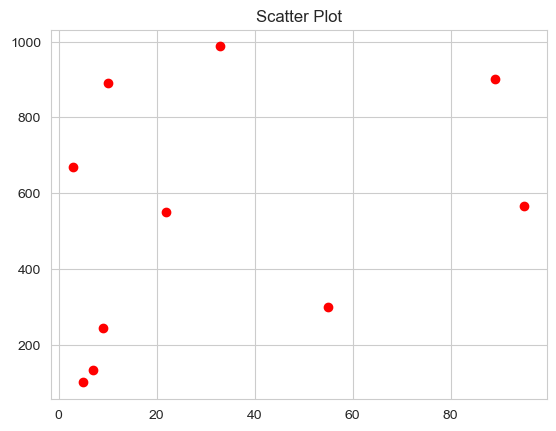

In [956]:

x=[5,7,9,22,3,89,10,95,33,55]
y=[100,133,244,550,670,900,890,567,987,300]
plt.scatter(x,y,c='red')
plt.title('Scatter Plot')

plt.show()

### Qs.12 What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes?

In [958]:


# Adding all VO2 values for each athlete
vO2_sum=All_sports.groupby(['ID'])['VO2'].sum()
#print(vO2_sum_df)

#Inner join on VO2sum and athletes based on ID and writing the specific values to a new dataframe
athletenew_df=pd.merge(Athletes,vO2_sum, on='ID', how='inner')[['ID','First Name','Last Name','Weight','Height','sport','VO2']]
#print(athletenew_df)


#Calculating VO2ml/kg for each athlete and writing it to the dataframe
athletenew_df['VO2mlperkg']=(athletenew_df['VO2']/athletenew_df['Weight'])
print(athletenew_df.sort_values(by='VO2mlperkg',ascending=False).head(3))

    ID First Name  Last Name  Weight  Height  sport          VO2  VO2mlperkg
11  12      Caleb      Dixon    86.0     183  kayak  7934.206192   92.258212
12  13        Mia  Carpenter    83.9     183  kayak  7614.654355   90.758693
10  11   Isabella    Griffin    84.8     182  kayak  7596.969334   89.586903


### Qs.13 Calculate the year of birth of each athlete and store it as a column in the tables.

In [960]:
Athletes['DOB']=datetime.now().year-Athletes['age']
print(Athletes)

    ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1   15    53.7     161     50    140    fencing  Female   African   
1    2   15    56.2     162     80    127    fencing    Male   African   
2    3   16    89.9     191    155    300    fencing    Male     White   
3    4   16    76.5     180    215    275    fencing    Male     White   
4    5   17    76.4     186    110    172    fencing  Female     White   
5    6   17    65.6     169    131    186    fencing  Female     White   
6    7   15    49.8     165     65    108    fencing  Female     White   
7    8   15    51.2     165     80    133    fencing  Female     White   
8    9   14    57.1     176     50    125    fencing  Female   African   
9   10   14    58.8     177    101    162    fencing  Female   African   
10  11   18    84.8     182    174    268      kayak  Female   African   
11  12   18    86.0     183    170    294      kayak    Male   African   
12  13   18    83.9     183    144    

### Qs.14 What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [962]:
print(athletenew_df.sort_values(by='VO2mlperkg').head(3))

   ID First Name Last Name  Weight  Height    sport          VO2  VO2mlperkg
6   7      Grace   Simmons    49.8     165  fencing  1912.518617   38.403988
1   2      Ethan  Reynolds    56.2     162  fencing  2171.152256   38.632602
0   1     Olivia  Martinez    53.7     161  fencing  2298.775092   42.807730


### Qs.15 Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
#Zone 1 (recovery/easy)       <100 HR max
#Zone 2 (aerobic/base)        100-120 HR max
#Zone 3 (tempo)        120-135 HR max
#Zone 4 (lactate threshold)        135-155 HR max
#Zone 5 (anaerobic)        155+ HR max and above

In [964]:
#pd.set_option('display.max_rows',1000)
print(merged_sports[['HR_Zone','HR']])

                          HR_Zone      HR
0          Zone 1 (recovery/easy)   82.53
1          Zone 1 (recovery/easy)   82.42
2          Zone 1 (recovery/easy)   82.87
3          Zone 1 (recovery/easy)   90.36
4          Zone 1 (recovery/easy)   92.59
...                           ...     ...
52057  Zone 4 (Lactate threshold)  140.19
52058  Zone 4 (Lactate threshold)  141.51
52059  Zone 4 (Lactate threshold)  140.19
52060  Zone 4 (Lactate threshold)  141.51
52061  Zone 4 (Lactate threshold)  140.19

[52062 rows x 2 columns]


### Qs16 Calculate the BMI of every athlete and display it as a list?

In [966]:
Athletes['BMI']=Athletes['Weight']/((Athletes['Height']/100)**2)
BMI_list=Athletes['BMI'].to_list()
for i in range(0,len(BMI_list)):
  BMI_list[i]=round(BMI_list[i],2)

print(BMI_list)

[20.72, 21.41, 24.64, 23.61, 22.08, 22.97, 18.29, 18.81, 18.43, 18.77, 25.6, 25.68, 25.05, 21.31, 21.46, 21.25, 16.4, 15.9]


### Qs17. What is the maximum ventilatory threshold for triathletes.

In [968]:
Triathletes=Athletes[(Athletes['sport']=='triathlon')]
#Triathletes

Max_Ventilatory_threshold=Triathletes[['P_vt1','P_vt2']].describe()
Max_Ventilatory_threshold.loc['max']

#Another Solution
#Max_Ventilatory_threshold=Triathletes[['P_vt1','P_vt2']].max()
#Max_Ventilatory_threshold


P_vt1    101.0
P_vt2    168.0
Name: max, dtype: float64

### Qs18. Display the number of athletes in every sport against the name of the sport.

In [970]:
Athletes['sport'].value_counts()

sport
fencing      10
kayak         6
triathlon     2
Name: count, dtype: int64

### Qs19. Display a bar chart showing the average V02 Max by sport.

<BarContainer object of 3 artists>

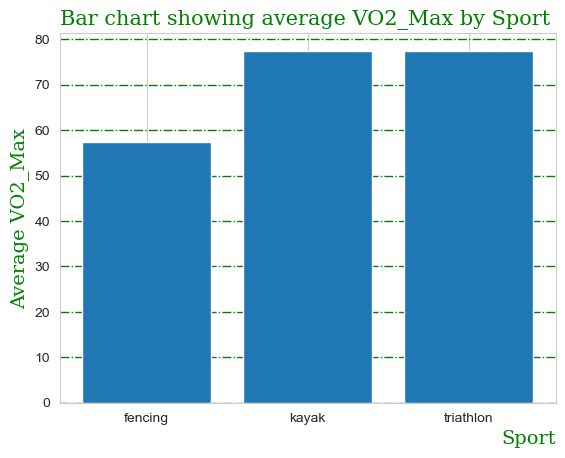

In [972]:
#for calculating the average VO2
sum_vo2=merged_sports.groupby(['ID'])['VO2'].sum()
#print(sum_vo2)
df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','VO2','sport','Weight']]
#print(df1)


for index,row in df1.iterrows():
      df1.at[index,'max_vo2']=round(df1.at[index,'VO2']/df1.at[index,'Weight'],2)
      df2=df1.groupby('sport')['max_vo2'].mean()
#print(df2)

sport=[]
avg_vo2_max=[]

for key in df2.keys():
    sport.append(key)
    avg_vo2_max.append(df2[key])

#print(sport)
#print(avg_vo2_max)

font1 = {'family':'serif', 'color':'green', 'size':15}
font2 = { 'family':'serif', 'color':'green', 'size':14}

plt.xlabel("Sport", fontdict = font2, loc = "right")
plt.ylabel("Average VO2_Max", fontdict = font2, loc='center') # top, center, bottom
plt.title("Bar chart showing average VO2_Max by Sport", fontdict = font1, loc = 'left')

plt. grid(axis = 'y',color ='g', linestyle = 'dashdot', linewidth=1) # dashed, solid, dottedd, dashdot, '-' ':', 'None', " ", '','-.'
plt.bar(sport,avg_vo2_max)


### Qs20. Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend?



 Based on the analysis - As the Graded Exercise Test is done for a longer time,  we can see that the trend of Heart Rate is also increasing




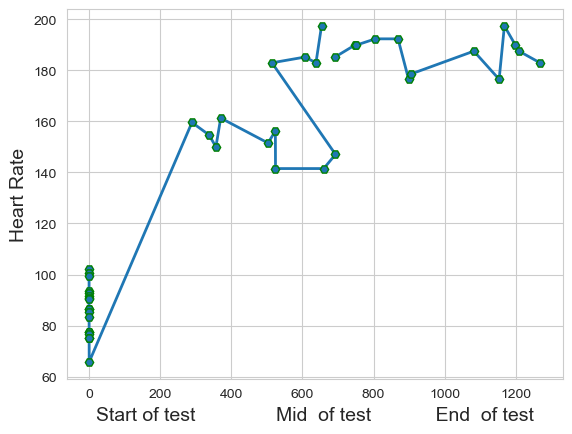

In [974]:

Stage_df=merged_sports[(merged_sports['stage'] == 'Get')]
#print(Stage_df)

start_test=Stage_df.groupby('ID')['time'].min().reset_index(name='start_time')
middle_test=Stage_df.groupby('ID')['time'].median().reset_index(name='mid_time')
end_test=Stage_df.groupby('ID')['time'].max().reset_index(name='end_time')
#print(start_test)
#print(middle_test)
#print(end_test)

start_test_HR =pd.merge(start_test,Stage_df,left_on=['ID','start_time'],right_on=['ID','time'], how='inner')[['ID','start_time','HR']].sort_values(by='start_time')
#print(start_test_HR)

middle_test_HR =pd.merge(middle_test,Stage_df,left_on=['ID','mid_time'],right_on=['ID','time'], how='inner')[['ID','mid_time','HR']].sort_values(by='mid_time')
#print(middle_test_HR)

end_test_HR =pd.merge(end_test,Stage_df,left_on=['ID','end_time'],right_on=['ID','time'], how='inner')[['ID','end_time','HR']].sort_values(by='end_time')
#print(end_test_HR)

merge_test=pd.merge(pd.merge(start_test_HR,middle_test_HR, on='ID', how='left'),end_test_HR,on='ID', how='right')
#print(merge_test)

#name_list = df['Name'].values.tolist()
ID_list=start_test_HR['ID'].values.tolist()
#print(ID_list)
HR_list_st=start_test_HR['HR'].values.tolist()
#print(HR_list_st)
Time_st=start_test_HR['start_time'].values.tolist()
#print(Time_st)

HR_list_md=middle_test_HR['HR'].values.tolist()
#print(HR_list_md)
Time_md=middle_test_HR['mid_time'].values.tolist()
#print(Time_md)

HR_list_end=end_test_HR['HR'].values.tolist()
#print(HR_list_end)
Time_end=end_test_HR['end_time'].values.tolist()
#print(Time_end)

HR_list=HR_list_st+HR_list_md+HR_list_end
Time_list=Time_st+Time_md+Time_end
#print(HR_list)
#print(Time_list)

a = HR_list
b = Time_list

plt.plot(b,a, marker ='H',lw=2, mec = 'g')

plt.xlabel("Start of test               Mid  of test            End  of test", fontsize=14)
plt.ylabel("Heart Rate", fontsize= 14)
print()
print()
print(" Based on the analysis - As the Graded Exercise Test is done for a longer time,  we can see that the trend of Heart Rate is also increasing")
print()
print()

### Qs.21 Display a pie chart of number of athletes by sport.

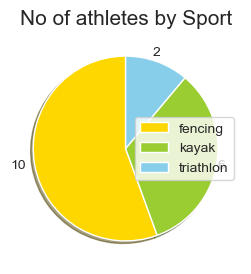

In [976]:
df=Athletes['sport'].value_counts()
df=df.to_dict()

sport=[]
No_of_athletes=[]

for key in df.keys():
    sport.append(key)
    No_of_athletes.append(df[key])

#print(sport)
#print(No_of_athletes)

colors = ['gold', 'yellowgreen','skyblue']

plt.figure(figsize=(len(sport),len(No_of_athletes)))
plt.pie(No_of_athletes, labels = No_of_athletes,colors=colors,shadow=True,startangle=90, center = (-2,0))
plt.title("No of athletes by Sport", fontsize=15)
plt.legend(labels = sport)



### Qs.22 Using any 10 HR values print even if the value is an even number and odd if its an odd number

In [978]:
All_sports['HR']=round(60000/All_sports['RR'])
HR_random=All_sports['HR']
HR_random=HR_random.drop_duplicates().head(10)

for i in HR_random:
    if i%2==0:
        print(i," - even ")
    else:
        print(i," - odd ")

83.0  - odd 
82.0  - even 
90.0  - even 
93.0  - odd 
97.0  - odd 
86.0  - even 
75.0  - odd 
76.0  - even 
78.0  - even 
77.0  - odd 


### Qs.23 Which heart rate zone did most participants spend the longest duration of time in?

In [980]:
#print(merged_sports)
Stage_ID_HR_counts=merged_sports.groupby(['ID','HR_Zone'])['stage'].value_counts()
#print(Stage_ID_HR_counts.head(25))

warm_up_df=merged_sports[(merged_sports['stage'] == 'Warm up')]
get_df=merged_sports[(merged_sports['stage'] == 'Get')]
cool_down_df=merged_sports[(merged_sports['stage'] == 'Cool down')]
#print(warm_up_df)

######################     Warm UP     ##############################

warm_time=warm_up_df.groupby(['HR_Zone'])['time'].min()
warm_time=warm_time.to_dict()


for key in warm_time.keys():
    warm_time[key]=round(abs(warm_time[key])/60,2)

warm_time['Zone 4 (Lactate threshold)']=0
warm_time['Zone 5(AnAerobic)']=0
#print(warm_time)
# For adding label to time in minutes - used below formatting technique
#print("{:<30} {:<30} ".format('Zone','WU Time Minutes'))
for k, v in warm_time.items():
    label = v
    #print("{:<30} {:<30} ".format(k, label))
    
##########################   GET       ###################################
get_time=get_df.groupby(['HR_Zone'])['time'].max()
#print(get_time)
get_time=get_time.to_dict()

for key in get_time.keys():
    get_time[key]=round(abs(get_time[key])/60,2)

#print(get_time)
# For adding label to time in minutes - used below formatting technique
#print("{:<30} {:<30} ".format('Zone','GET Time Minutes'))
for k, v in get_time.items():
    label = v
    #print("{:<30} {:<30} ".format(k, label))


#################################  Cool Min    ############################
cool_min_time=cool_down_df.groupby(['HR_Zone'])['time'].min()
#print(cool_min_time)
cool_min_time=cool_min_time.to_dict()

for key in cool_min_time.keys():
    cool_min_time[key]=round(abs(cool_min_time[key])/60,2)

#print(cool_min_time)
# For adding label to time in minutes - used below formatting technique
#print("{:<30} {:<30} ".format('Zone','CoolMin Time Minutes'))
for k, v in cool_min_time.items():
    label = v
    #print("{:<30} {:<30} ".format(k, label))

#####################################  Cool Max   ####################################
cool_max_time=cool_down_df.groupby(['HR_Zone'])['time'].max()
#print(cool_max_time)
cool_max_time=cool_max_time.to_dict()

for key in cool_max_time.keys():
    cool_max_time[key]=round(abs(cool_max_time[key])/60,2)

#print(cool_max_time)
# For adding label to time in minutes - used below formatting technique
#print("{:<30} {:<30} ".format('Zone','CoolMax Time Minutes'))
for k, v in cool_max_time.items():
    label = v
    #print("{:<30} {:<30} ".format(k, label))

####################################  Cool_time (Max-Min)  #########################
cool_time={}
######   res = {key: test_dict2[key] - test_dict1[key] for key in set(test_dict1) & set(test_dict2)}
cool_time={key: cool_max_time[key] - cool_min_time[key] for key in set(cool_min_time) & set(cool_max_time)}
#print(type(cool_time))
#print(cool_time)

for key in cool_time.keys():
    cool_time[key]=round(abs(cool_time[key]),2)

#print(cool_time)
# For adding label to time in minutes - used below formatting technique
#print("{:<30} {:<30} ".format('Zone','Cool Time Minutes'))
for k, v in cool_time.items():
    label = v
    #print("{:<30} {:<30} ".format(k, label))

####################   Now, add Warm-up, GET and Cool down time to get total time spent Zone wise  ################################



Total_time={key: warm_time[key] + get_time[key] + cool_time[key] for key in set(warm_time) & set(get_time) & set(cool_time)}


# For adding label to time in minutes - used below formatting technique
print("{:<30} {:<30} ".format('Zone','Total Time in Minutes'))
for k, v in Total_time.items():
    label = v
    print("{:<30} {:<30} ".format(k, label))

##########     Now, Find the Zone with maximum number of minutes spent    ##################

str=max(Total_time.items(), key=operator.itemgetter(1))[0]
print()
print(str," was the Zone with longest duration of time spent by most pariticpants.")
print()

Zone                           Total Time in Minutes          
Zone 2 (Aerobic/base)          25.3                           
Zone 1 (recovery/easy)         23.92                          
Zone 4 (Lactate threshold)     28.79                          
Zone 3 (tempo)                 27.03                          
Zone 5(AnAerobic)              34.71                          

Zone 5(AnAerobic)  was the Zone with longest duration of time spent by most pariticpants.



### Qs.24 Store athlete name and sport in a dictionary as a pair of values.

In [982]:
fname=Athletes['First Name']
lname=Athletes['Last Name']
full_name=fname+' '+lname
Name_sport_dict=Athletes.set_index(full_name)['sport'].to_dict()
Name_sport_dict

{'Olivia Martinez': 'fencing',
 'Ethan Reynolds': 'fencing',
 'Jackson Harper': 'fencing',
 'Liam Sanchez': 'fencing',
 'Ava Thompson': 'fencing',
 'Sophia Rodriguez': 'fencing',
 'Grace Simmons': 'fencing',
 'Aiden Bennett': 'fencing',
 'Chloe Price': 'fencing',
 'Lily Jordan': 'fencing',
 'Isabella Griffin': 'kayak',
 'Caleb Dixon': 'kayak',
 'Mia Carpenter': 'kayak',
 'Harper Mitchell': 'kayak',
 'Mason Wallace': 'kayak',
 'Logan Anderson': 'kayak',
 'Lucas Foster': 'triathlon',
 'Owen Myers': 'triathlon'}

### Qs.25 Using arrays and loops, find the count of athletes based on gender.

In [984]:
athletes_male=[]
athletes_female=[]

for fname,gender in zip(Athletes['First Name'],Athletes['Gender']):
    if gender == 'Male':
        athletes_male.append(fname)
    else:
        athletes_female.append(fname)

print('Male: ',len(athletes_male))
print('Female: ',len(athletes_female))


Male:  8
Female:  10


### Qs.26 Create a sankey diagram to show the groups of race within each sport

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
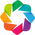

:Sankey   [sport,Ethnicity]   (count)

In [986]:
import holoviews as hv

df=Athletes.groupby(['sport'])['Ethnicity'].value_counts().reset_index(name="count")
#print(df)

hv.extension('bokeh')
sankey = hv.Sankey(df, label='Demographics by Sport')
sankey.opts(label_position='left', edge_color='Ethnicity', node_color='index', cmap='tab20')


### Qs.27 Calculate the average heart rate for every minute for every athlete and add it as a column in the same dataframe.

In [988]:
All_sports['Avg_HR']=All_sports.groupby(['ID'])['HR'].mean()
print(All_sports)

       ID     time     RR       VO2  power      stage     HR      Avg_HR
0      11 -168.600  727.0  0.287147      0    Warm up   83.0         NaN
1      11 -167.872  728.0  0.287147      0    Warm up   82.0  155.113608
2      11 -167.148  724.0  0.287147      0    Warm up   83.0  139.278000
3      11 -166.484  664.0  0.320580      0    Warm up   90.0  136.631136
4      11 -165.836  648.0  0.320580      0    Warm up   93.0  149.045479
...    ..      ...    ...       ...    ...        ...    ...         ...
27598  10  942.700  428.0  0.786363      0  Cool down  140.0         NaN
27599  10  943.124  424.0  0.786363      0  Cool down  142.0         NaN
27600  10  943.552  428.0  0.786363      0  Cool down  140.0         NaN
27601  10  943.976  424.0  0.786363      0  Cool down  142.0         NaN
27602  10  944.404  428.0  0.786363      0  Cool down  140.0         NaN

[52062 rows x 8 columns]


### Qs.28  Print athlete 15s Age and Pvt1 using the format() function

In [990]:
df=Athletes[(Athletes['ID'] == 15)]
df_dict=df.to_dict('list')

athlete_details="Athlete ID is {ID}, His age is {age} and his P_vt1 is {pvt1}".format(ID=df_dict['ID'],age=df_dict['age'],pvt1=df_dict['P_vt1'])
print(athlete_details)


Athlete ID is [15], His age is [13] and his P_vt1 is [125]


### Qs.29 On average how long was each participants’ warm up?

In [992]:
Stage_ID_HR_counts=merged_sports.groupby(['ID','HR_Zone'])['stage'].value_counts()
#print(Stage_ID_HR_counts.head(25))

Stage_df=merged_sports[(merged_sports['stage'] == 'Warm up')]
#print(Stage_df)

ID_wrt_time=Stage_df.groupby(['ID'])['time'].min()
ID_wrt_time.to_dict()

for key in ID_wrt_time.keys():
    ID_wrt_time[key]=round(abs(ID_wrt_time[key])/60,2)

# For adding label to time in minutes - used below formatting technique
print("{:<8} {:<15} ".format('ID','Time in Minutes'))
for k, v in ID_wrt_time.items():
    label = v
    print("{:<8} {:<15} ".format(k, label))


ID       Time in Minutes 
1        2.18            
2        3.66            
3        3.04            
4        3.06            
5        3.01            
6        3.07            
7        3.04            
8        3.04            
9        3.6             
10       3.04            
11       2.81            
12       3.05            
13       3.07            
14       2.68            
15       3.08            
16       2.75            
17       3.04            
18       3.02            


### Qs.30 Display the HRV of each athlete?

In [994]:
HRV_athlete=merged_sports.groupby(['ID'])['RR'].std().reset_index(name='HRV')
print(HRV_athlete)

    ID         HRV
0    1  121.157152
1    2  180.730679
2    3  115.570278
3    4   96.588612
4    5  140.756819
5    6  347.787239
6    7  121.684478
7    8  387.432612
8    9  115.715009
9   10  133.765589
10  11   99.785372
11  12  110.027812
12  13  100.119653
13  14  172.115157
14  15  137.059986
15  16  575.089786
16  17  130.962202
17  18  143.344855


### Qs.31 Return the count of athletes for any sport that the user inputs.

In [996]:
sport_in=input("Enter any sport from the following - fencing/triathlon/kayak")
df=Athletes['sport'].value_counts()
df=df.to_dict()
#print(type(df))

for i in df:
        if i ==sport_in:
            print(df[sport_in])
        else:
            continue

Enter any sport from the following - fencing/triathlon/kayak kayak


6


### Qs.32 Insert the name of every athlete into an array and display the length of that array.

In [998]:
arr=[]
fname=Athletes['First Name']
lname=Athletes['Last Name']
full_name=fname+' '+lname


for i in full_name:
    arr.append(i)
print(len(arr))


18


### Qs33.Create a list and a tuple. Print the types and lengths of both

In [1000]:
list=['My','2nd','Python','Hackathon']
print(f"The type of this:", type(list) ,"and length of the list is:", len(list))

tuple=('Python','Hackathon','is','in','progress')
print(f"Type of this is: ",{type(tuple)},"and length of the tuple is: ", len(tuple))

The type of this: <class 'list'> and length of the list is: 4
Type of this is:  {<class 'tuple'>} and length of the tuple is:  5


### Qs34 Display a word cloud using any values in the dataset

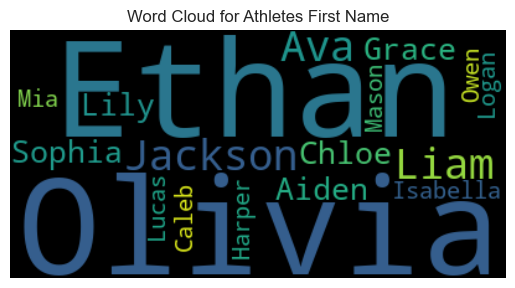

In [1002]:
# iterate through the Athletes data frame
for Name in Athletes.iterrows():

  # typecaste each First Name to string
  #first_names = str(Athletes['First Name'])
   first_names = Athletes['First Name'].to_string()

wordcloud = wc.WordCloud(width=400, height=200, background_color='black').generate(first_names)

#plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Athletes First Name')
plt.axis('off')
plt.show()

### Qs35 Create a Regression Plot on Max V02 and mean BMI for any sport of your choice

<Figure size 1200x800 with 0 Axes>

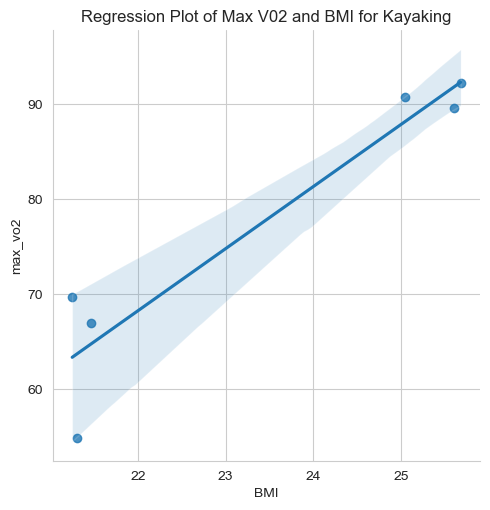

In [1004]:
# store sum of VO2 by grouping on ID
sum_vo2=Kayaking.groupby('ID')['VO2'].sum()

# merge to get ALL deTils
df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','VO2','sport','Weight','Height']]
# itterate through for loop to get MAX VO2 and BMI
for index, row in df1.iterrows():

        df1.at[index, 'max_vo2'] = round(df1.at[index, 'VO2']/df1.at[index, 'Weight'],2)
        df1.at[index, 'BMI'] = round(df1.at[index, 'Weight']/((df1.at[index, 'Height']/100)**2),2)
#print(df1)
plt.figure(figsize=(12,8))
sns.lmplot(x ='BMI', y ='max_vo2', data = df1)
sns.set_style('whitegrid')
plt.title('Regression Plot of Max V02 and BMI for Kayaking')
plt.show()



### Qs36 Plot the time series of HR( every 5 mins) of athlete 1

      ID     time      HR
0      1  619.388  194.81
1      1  619.700  192.31
2      1  620.012  192.31
3      1  620.320  194.81
4      1  620.632  192.31
...   ..      ...     ...
1711   1   27.488  107.14
1712   1    0.912   65.79
1713   1    1.620   84.75
1714   1    2.276   91.46
1715   1    2.952   88.76

[1716 rows x 3 columns]
time
0 days 00:00:00.912000    135.897267
0 days 00:05:00.912000    176.800489
0 days 00:10:00.912000    192.844386
Freq: 5min, Name: HR, dtype: float64


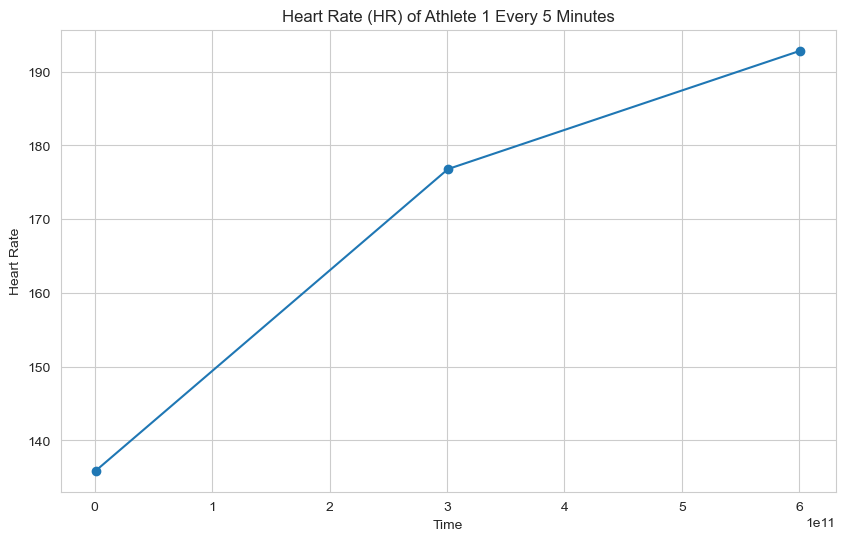

In [1006]:
# here I considered only GET test HR values

df_ath1=merged_sports.loc[(merged_sports['ID']==1) & (merged_sports['stage']=='Get')][['ID','time','HR']].reset_index().drop('index',axis=1)
print(df_ath1)

df_ath1['time'] = pd.to_timedelta(df_ath1['time'],unit='s')

df_ath1.set_index('time', inplace=True)

#print(df_ath1)
# Resample the data to 5-minute intervals, calculating the mean HR in each interval
df_ath1_resampled = df_ath1['HR'].resample('5T').mean()

print(df_ath1_resampled)

plt.figure(figsize=(10, 6))
plt.plot(df_ath1_resampled, marker='o', linestyle='-')
plt.title('Heart Rate (HR) of Athlete 1 Every 5 Minutes')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()


### Qs37 What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.

In [1008]:
# get the maximum power
result=All_sports.loc[All_sports['power']==All_sports['power'].max()]
#print(result)
# merge the data for other details
result1=pd.merge(result,Athletes,on='ID',how='inner')[['First Name','Last Name','sport','power']]
print("The maximum power achieved by:")
result1.iloc[0]

The maximum power achieved by:


First Name    Isabella
Last Name      Griffin
sport            kayak
power              335
Name: 0, dtype: object

### Qs38: What is the average difference in IBI during the warm up Vs the actual test?

In [1010]:
# Get the average IBI/RR by stage
avg_IBI=merged_sports.groupby('stage')['RR'].mean()
#print(avg_IBI)
print("The average difference in IBI during the warm up Vs the actual test is :" ,round(avg_IBI['Warm up']-avg_IBI['Get'],2))

The average difference in IBI during the warm up Vs the actual test is : 357.77


### Qs39 Print out what's in indexes 7, 10, and 3 for the array. [1, 2, 3, 4, 5,6,7,8,9,10]

In [1012]:
array=np.array([1, 2, 3, 4, 5,6,7,8,9,10])
print(array[7])
#print(array[10])  #Index 10 will give error as indexes starting from 0-9 for this array
print(array[3])

8
4


### Qs.40  [ 1,  2,  3,  4,  5],[ 6,  7,  8,  9, 10],[11, 12, 13, 14, 15],[16, 17, 18, 19, 20],[21, 22, 23, 24, 25],[26, 27, 28, 29, 30]  Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99

In [1014]:
my_array=np.array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26,27,28,29, 30] ] )

print(my_array[0][0],my_array[0][2],my_array[0][4])

for i in range(6):
  for j in range(5):
    if my_array[i][j]<4:
      my_array[i][j]=99
print(my_array)

1 3 5
[[99 99 99  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


### Qs41 What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

In [1016]:
# here considering only GET values
GET_test=merged_sports.loc[merged_sports['stage']=='Get']

# get the end time
end_of_test=GET_test.groupby('ID')['time'].max()

#print(end_of_test)
wattage=pd.merge(end_of_test,GET_test,on=['ID','time'],how='inner')[['ID','First Name','Last Name','sport','power']].sort_values(by='power')
#print(wattage)
print("The lowest wattage achieved at the end of a test by:" ,wattage.loc[wattage['power']==wattage['power'].min()].iloc[0].to_string(index=False))

The lowest wattage achieved at the end of a test by:        2
   Ethan
Reynolds
 fencing
     140


### Qs42 What was the difference in heart rate between warm up and GET for athlete 1

In [1018]:
#
df_ath1_HRinfo=merged_sports.loc[( merged_sports['ID']==1) & (merged_sports['stage'] !='Cool down')][['stage','HR']]
print(df_ath1_HRinfo.groupby('stage').mean())
print("The difference in heart rate between warm up and GET for athlete 1 is: ",df_ath1_HRinfo.groupby('stage').mean().iloc[1,0]-df_ath1_HRinfo.groupby('stage').mean().iloc[0,0])


                   HR
stage                
Get        162.524242
Warm up     79.986590
cool down   75.000000
The difference in heart rate between warm up and GET for athlete 1 is:  -82.53765282886668


### Qs43 Create a pivot table that shows count of patients within each age group and sport

In [1020]:
Athletes.pivot_table(columns="sport", index="age", values="ID", aggfunc="count", margins="True")


sport,fencing,kayak,triathlon,All
age,,,,
12,NaN,NaN,2.0,2
13,NaN,2.0,NaN,2
14,2.0,NaN,NaN,2
15,4.0,NaN,NaN,4
16,2.0,1.0,NaN,3
17,2.0,NaN,NaN,2
18,NaN,3.0,NaN,3
All,10.0,6.0,2.0,18


### Qs44 Display a distrubution chart of MAX V02 for all athletes

    ID  VO2_max
0    1    42.81
1    2    38.63
2    3    69.71
3    4    76.99
4    5    86.74
5    6    71.68
6    7    38.40
7    8    44.82
8    9    49.70
9   10    55.12
10  11    89.59
11  12    92.26
12  13    90.76
13  14    54.87
14  15    66.94
15  16    69.66
16  17    73.79
17  18    81.21


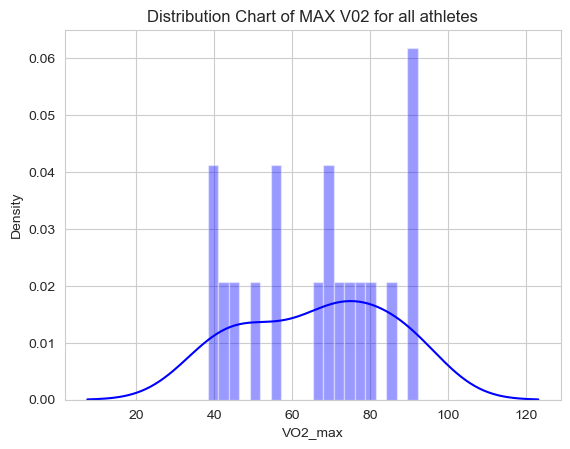

In [1022]:
sum_VO2=merged_sports.groupby('ID')['VO2'].sum()
#print(sum_VO2)

sum_VO2_max=pd.merge(sum_VO2,Athletes,on='ID',how='inner')[['ID','VO2','Weight']]
sum_VO2_max['VO2_max']=round(sum_VO2_max['VO2']/sum_VO2_max['Weight'],2)
max_vo2_by_athlete=sum_VO2_max[['ID','VO2_max']]
print(max_vo2_by_athlete)

#sns.histplot(max_vo2_by_athlete, kde=True, bins=20, color='blue')
sns.distplot(max_vo2_by_athlete['VO2_max'], kde=True, bins=20, color='blue')
plt.title('Distribution Chart of MAX V02 for all athletes')
plt.show()

### Qs45 Create a dummy array with no data with a size of 15.

In [1024]:
# Create a dummy array with a size of 15
dummy_array = np.empty(15)

print(dummy_array)

[2.10077583e-312 8.48798321e-314 1.27319747e-313 1.69759663e-313
 2.12199579e-313 2.54639495e-313 2.97079411e-313 3.39519327e-313
 3.81959242e-313 4.24399158e-313 4.66839074e-313 5.09278990e-313
 5.51718906e-313 5.94158822e-313 6.36598737e-313]


### Qs46 How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

In [1026]:
df_ath15_info=merged_sports.loc[(merged_sports['ID']==15) & (merged_sports['stage']=='Get')].reset_index().drop('index',axis=1)[['time','VO2','Weight']]
#print(df_ath15_info)
print("Participant 15's exercise last for:",df_ath15_info.iloc[-1]['time'],"seconds")
VO2_MAX=df_ath15_info['VO2'].sum()/df_ath15_info['Weight']
print("The total V02 max consumed during the test is:",VO2_MAX.iloc[1])

Participant 15's exercise last for: 805.26 seconds
The total V02 max consumed during the test is: 56.63316544070866



### Qs 47 Convert ' sport' into a numeric field through Label encoding

In [1028]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Athletes['sport_LabelEncoding']=le.fit_transform(Athletes['sport'])
Athletes

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,DOB,BMI,sport_LabelEncoding
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,2009,20.716793,0
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds,2009,21.414419,0
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper,2008,24.642965,0
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez,2008,23.611111,0
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson,2007,22.083478,0
5,6,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez,2007,22.968383,0
6,7,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons,2009,18.292011,0
7,8,15,51.2,165,80,133,fencing,Female,White,Aiden,Bennett,2009,18.806244,0
8,9,14,57.1,176,50,125,fencing,Female,African,Chloe,Price,2010,18.433626,0
9,10,14,58.8,177,101,162,fencing,Female,African,Lily,Jordan,2010,18.768553,0


### Qs48 What was the average age of the athletes?

In [1030]:
print("The average age of the Athletes is: ",  round(Athletes['age'].mean(),2))

The average age of the Athletes is:  15.22


### Qs 49. Retrieve the row with minimum IBI for fencing athletes using sorting technique.

In [1032]:
#RR interval is also referred to as IBI.
print("Row with minimum IBI value for Fencing athletes is:")
Fencing.sort_values(by='RR').head(1)

Row with minimum IBI value for Fencing athletes is:


,ID,time,RR,VO2,power
19582,7,596.372,252,1.293014,155


### Qs 50. Create a violin chart using any 2 columns in the dataset

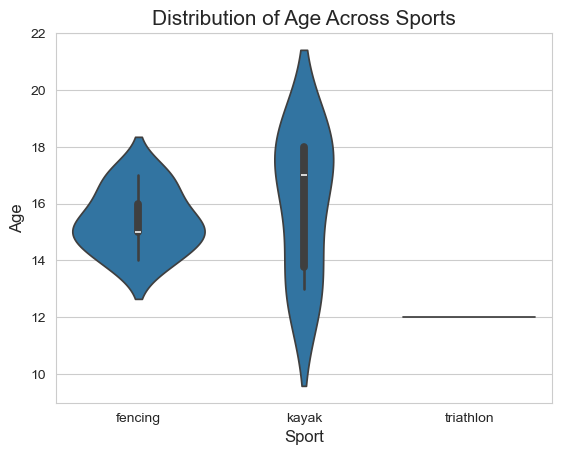

In [1034]:
#plt.figure(figsize=(12,8))
sns.violinplot(x='sport', y='age', data=Athletes) #x & y coordinates and dataset to be used for violin chart
#Genderwise distribution of age across sports
#sns.violinplot(x='sport', y='age', data=Athletes, hue='Gender',split=True,palette='Blues')
plt.title("Distribution of Age Across Sports",fontsize=15) #title of chart &fontsize
plt.xlabel("Sport",fontsize=12) #x axis label & fontsize
plt.ylabel("Age",fontsize=12) # y axis label &fontsize
plt.show()

### Qs 51. List every athlete’s V02 ml/kg

In [1036]:
# Adding all VO2 values for each athlete
vO2_sum=All_sports.groupby(['ID'])['VO2'].sum()
#print(vO2_sum_df)

#Inner join on VO2sum and athletes based on ID and writing the specific values to a new dataframe
athletenew_df=pd.merge(Athletes,vO2_sum, on='ID', how='inner')[['ID','First Name','Last Name','Weight','Height','sport','VO2']]
#print(athletenew_df)


#Calculating VO2ml/kg for each athlete and writing it to the dataframe
athletenew_df['VO2mlperkg']=(athletenew_df['VO2']/athletenew_df['Weight']).round(2)
#print(athletenew_df)

#Printing the 2 values from the dataframe
athletenew_df[['ID','First Name','Last Name','VO2mlperkg']]

,ID,First Name,Last Name,VO2mlperkg
0,1,Olivia,Martinez,42.81
1,2,Ethan,Reynolds,38.63
2,3,Jackson,Harper,69.71
3,4,Liam,Sanchez,76.99
4,5,Ava,Thompson,86.74
5,6,Sophia,Rodriguez,71.68
6,7,Grace,Simmons,38.40
7,8,Aiden,Bennett,44.82
8,9,Chloe,Price,49.70
9,10,Lily,Jordan,55.12


### Qs 52. Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

VO2max is the most relevant measure of fitness for evaluating an athlete's endurance and cardiovascular health. Higher VO2max values generally indicate better cardiovascular and respiratory efficiency, which is crucial for endurance sports. Athlete 12, Caleb Dixon has the highest VO2max of 92.26 ml/kg. Hence athlete 12 is the fittest athlete.

### Qs 53. phonebook={"john":938477566,"Jack":938377264,"Jill":947662781} ,find the phone number of Jill

In [1040]:
phonebook = {
    "john":938477566,
    "Jack":938377264,
    "Jill":947662781
}

#checking if key is present in dictionary and printing the corresponding value
if "Jill" in phonebook:
    print(f'Jill - {phonebook["Jill"]}')
else:
    print("Jill is not listed in the phonebook")

Jill - 947662781


### Qs 54. Create a Pie chart for Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID

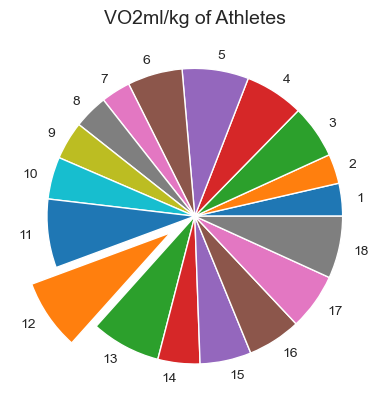

In [1042]:
#athletenew_df

# Finding the index of the highest VO2 value
vo2_max_index = athletenew_df['VO2mlperkg'].idxmax()
#print(vo2_max_index)

# Define explode array with 0.2 for the slice with the maximum VO2
explodes = [0.2 if max == vo2_max_index else 0 for max in range(len(athletenew_df))]

# Creates pie chart
#plt.figure(figsize=(10, 8))
plt.pie(athletenew_df['VO2mlperkg'], explode=explodes, labels=athletenew_df['ID'])
plt.title('VO2ml/kg of Athletes', fontsize=14)
plt.show()

### Qs 55. Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate

In [1044]:
#60/(RR/1000) will give you Heart rate per minute
tr_heartrate=(60/(Triathlon['RR']/1000)).round(2) ## Calculating the heart rate from RR value

#Writing the triathlon dataframe to a new dataframe and adding the heartrate to the new dataframe
triathlon_new=Triathlon
triathlon_new['Heartrate']=tr_heartrate

#print(triathlon_new)

#Getting the maximum heartrate of each athlete
hr_id=triathlon_new.groupby(['ID'])['Heartrate'].max()
#print(hr_id)

hr_dict=hr_id.to_dict()
#print(hr_dict)

highhr=0

# finding the highest heartrate from all athletes
for number in hr_id:
    if number>highhr:
        highhr=number
#print(highhr)

#Merging the triathlon_new and athletes table to get the details of the athletes
athlete_tri=pd.merge(triathlon_new,Athletes,on='ID',how='inner')
#print(athlete_tri)

#printing the details of the athlete with the highest heartrate
athlete_det=athlete_tri[(athlete_tri['Heartrate']==highhr)]
#print(f"Athlete ID: {athlete_det['ID']}\n Athlete Name: {athlete_det['First Name']} {athlete_det['Last Name']}\n Age: {athlete_det['age']}\n Gender: {athlete_det['Gender']}\n Weight: {athlete_det['Weight']}\n Height: {athlete_det['Height']}\n Sport: {athlete_det['sport']}\n Heart Rate: {athlete_det['Heartrate']}")
print(athlete_det[['ID','First Name','Last Name','age','Gender','Weight','Height','Heartrate']])

      ID First Name Last Name  age Gender  Weight  Height  Heartrate
4152  18       Owen     Myers   12   Male    39.7     158     197.37


### Qs 56. Display a histogram to show distribution of athletes by sport.

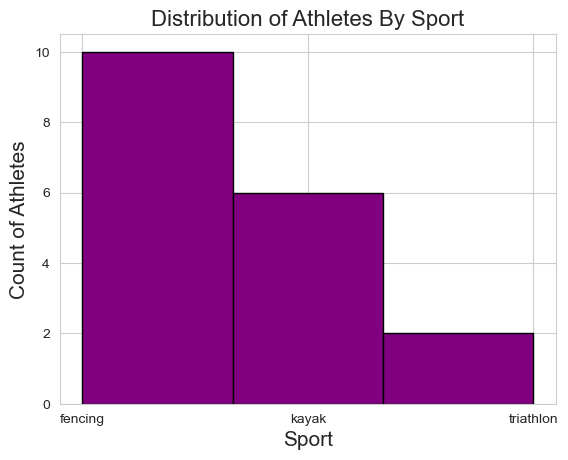

In [1046]:
#plt.figure(figsize=(10,8))
plt.hist(Athletes['sport'],bins=3,color='purple',edgecolor='black')
plt.xlabel("Sport",fontsize=15)
plt.ylabel("Count of Athletes",fontsize=15)
plt.title("Distribution of Athletes By Sport",fontsize=16)
plt.show()

### Qs 57. Get the first letter of last name of students using for loops and RegEX

In [1048]:

Names = ["Olivia Martinez", "Ethan Reynolds", "Jackson Harper", "Liam Sanchez"]

for name in Names:
     #Using regex to match the last name after the blank space
     match = re.search(r'\b(\w+)$', name)

     if match:
        # Extracting the first letter of the last name
        first_letter = match.group(1)[0]
        print(f"First letter of last name in '{name}'  is  {first_letter}")
     else:
        print("No last name found")

First letter of last name in 'Olivia Martinez'  is  M
First letter of last name in 'Ethan Reynolds'  is  R
First letter of last name in 'Jackson Harper'  is  H
First letter of last name in 'Liam Sanchez'  is  S


### Qs 58. What is the average % difference in heart rate between warm up and GET for all athletes?

In [1050]:
# Filter and get only the GET and Warmup data and group them by ID
ath1_HRinfo=merged_sports.loc[merged_sports['stage'] !='Cool down'].groupby(['ID','stage'])['HR'].mean()
#print(ath1_HRinfo)
ath1_HRinfo=ath1_HRinfo.unstack()
#print(ath1_HRinfo)
ath1_HRinfo['Diff HR']=ath1_HRinfo['Get']-ath1_HRinfo['Warm up']
print(ath1_HRinfo)
print()
print("The average difference in heart rate between warm up and GET for all athletes is: ",round(ath1_HRinfo['Diff HR'].mean(),2))

stage         Get    Warm up  cool down    Diff HR
ID                                                
1      162.524242  79.986590      75.00  82.537653
2      154.913218  66.853112      63.56  88.060106
3      142.223221  79.782881      87.72  62.440339
4      152.314551  91.995891      98.04  60.318660
5      152.723375  80.976878      99.34  71.746497
6      143.087561  69.492370      88.24  73.595191
7      155.782105  83.641833     100.67  72.140272
8      146.861512  67.542228      91.46  79.319285
9      164.819213  89.687714      98.68  75.131499
10     155.917431  78.849619      90.36  77.067812
11     144.753626  87.210840      94.94  57.542786
12     147.688619  83.592540      73.53  64.096080
13     147.577860  90.186788      85.71  57.391071
14     148.920067  78.368061      56.82  70.552006
15     151.592592  75.705240      85.23  75.887352
16     151.615054  81.778924      96.77  69.836130
17     152.170669  79.896333      80.65  72.274335
18     156.140258  71.021698   

### Qs 59. Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [1052]:
#print(Athletes)
#print(athletenew_df)

# Finding the index of the tallest athlete
tallathlete_index = athletenew_df['Height'].idxmax()

# Getting details of the tallest athlete
tallest_athlete = athletenew_df.loc[tallathlete_index]

print(f"Athlete ID: {tallest_athlete['ID']} \nName: {tallest_athlete['First Name']} {tallest_athlete['Last Name']}\nHeight: {tallest_athlete['Height']}\nVO2ml/kg:{tallest_athlete['VO2mlperkg']}\nSport: {tallest_athlete['sport']}" )

Athlete ID: 3 
Name: Jackson Harper
Height: 191
VO2ml/kg:69.71
Sport: fencing


### Qs 60. Get the last letter of athletes last names using RegEX .

In [1054]:
last_letter = [] # Initializing an empty list to store the last letters of the last names

# Using for loop to iterate over the list of  names
for last_name in Athletes['Last Name']:
    # Extracting the last letter using regex
    match = re.search(r'(\w)\b$', last_name)
    if match:
        last_letter.append(match.group(1))
print(f"Last Names are : \n {Athletes['Last Name']}")
print(f" Last Letters in Last Names are {last_letter}")

Last Names are : 
 0      Martinez
1      Reynolds
2        Harper
3       Sanchez
4      Thompson
5     Rodriguez
6       Simmons
7       Bennett
8         Price
9        Jordan
10      Griffin
11        Dixon
12    Carpenter
13     Mitchell
14      Wallace
15     Anderson
16       Foster
17        Myers
Name: Last Name, dtype: object
 Last Letters in Last Names are ['z', 's', 'r', 'z', 'n', 'z', 's', 't', 'e', 'n', 'n', 'n', 'r', 'l', 'e', 'n', 'r', 's']


### Qs 61. Reverse an arrays order in Python. You can use any array with any values you like.

In [1056]:
numbers=[10,20,30,40,50,60,70]
print(f" The reverse of array {numbers} is :")
print(numbers[::-1]) #printing in reverse order using negative index

 The reverse of array [10, 20, 30, 40, 50, 60, 70] is :
[70, 60, 50, 40, 30, 20, 10]


### Qs 62. What is the root mean of successive differences for 30 consecutive minutes for each athlete.

In [1058]:
#result =  merged_sports.groupby(['ID']).apply(lambda x: np.sqrt(np.mean(np.square(np.diff(merged_sports['RR'])))))
#result

In [1059]:
# Convert the 'time' column to datetime format
sports_cpy=merged_sports.copy()
sports_cpy['time'] = pd.to_timedelta(sports_cpy['time'],unit='s')

# Set the 'time' column as the index
sports_cpy.set_index('time', inplace=True)


# Sort the DataFrame by 'ID' and 'time'
sports_cpy.sort_values(by=['ID', 'time'], inplace=True)
print(sports_cpy)
# Function to calculate RMSSD for a given HR series

def calculate_root_mean(hr_series):
    diff = np.diff(hr_series)  # Calculate successive differences
    squared_diff = diff ** 2   # Square the differences
    mean_squared_diff = np.mean(squared_diff)  # Mean of squared differences
    root_mean = np.sqrt(mean_squared_diff)  # Square root of the mean
    return root_mean

# Group by athlete and resample the time series into 30-minute intervals
root_mean_results = sports_cpy.groupby('ID').resample('30T').apply(lambda x: calculate_root_mean(x['HR']))

                          ID     RR       VO2  power      stage  age  Weight  \
time                                                                           
-1 days +23:57:49.160000   1  672.0  0.302008      0    Warm up   15    53.7   
-1 days +23:57:49.832000   1  672.0  0.302008      0    Warm up   15    53.7   
-1 days +23:57:50.464000   1  632.0  0.301336      0    Warm up   15    53.7   
-1 days +23:57:51.176000   1  712.0  0.301336      0    Warm up   15    53.7   
-1 days +23:57:52.052000   1  876.0  0.301336      0    Warm up   15    53.7   
...                       ..    ...       ...    ...        ...  ...     ...   
0 days 00:15:47.288000    18  536.0  0.507071      0  Cool down   12    39.7   
0 days 00:15:47.816000    18  528.0  0.507071      0  Cool down   12    39.7   
0 days 00:15:48.344000    18  528.0  0.507071      0  Cool down   12    39.7   
0 days 00:15:48.884000    18  540.0  0.507071      0  Cool down   12    39.7   
0 days 00:15:49.424000    18  540.0  0.5

### Qs 63. On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

In [1061]:
#Extracting records of fencing athletes in zone5
zone5_df=merged_sports[(merged_sports['HR_Zone'] == 'Zone 5(AnAerobic)') & (merged_sports['sport']=='fencing')]
# Grouping by athletic ID and calculating the average time for each athlete
zone5_time=((zone5_df.groupby(['ID'])['time'].mean())/60).round(2).reset_index(name="Avg Zone5_time")
zone5_time

,ID,Avg Zone5_time
0,1,8.77
1,2,6.76
2,3,17.04
3,4,17.35
4,5,14.76
5,6,13.14
6,7,8.34
7,8,9.10
8,9,8.62
9,10,10.62


### Qs 64. Count athletes based on Gender using count plot

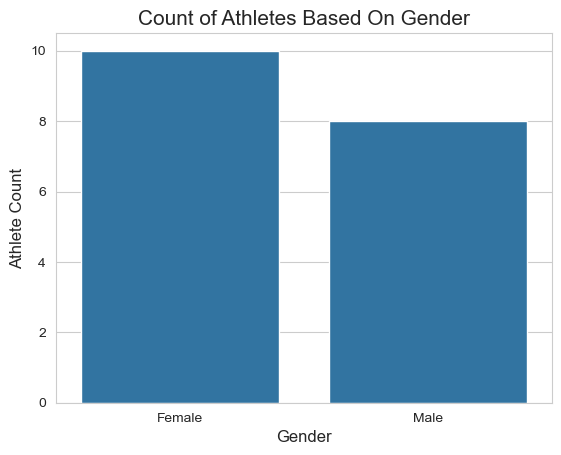

In [1063]:
#plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=Athletes)
plt.title("Count of Athletes Based On Gender",fontsize=15)
plt.xlabel("Gender",fontsize=12)
plt.ylabel("Athlete Count",fontsize=12)
plt.show()

 ### Qs65.  [ 1,  2,  3,  4,  5],[ 6,  7,  8,  9, 10],[11, 12, 13, 14, 15],[16, 17, 18, 19, 20],[21, 22, 23, 24, 25],[26, 27, 28, 29, 30]  Use array slicing to display elements 4,7,10,17.

In [1065]:
fived_array=np.array([ [ 1,  2,  3,  4,  5],
   [ 6,  7,  8,  9, 10],
   [11, 12, 13, 14, 15],
   [16, 17, 18, 19, 20],
   [21, 22, 23, 24, 25],
   [26, 27, 28, 29, 30] ])
print(fived_array[0][3],",",fived_array[1][1],",",fived_array[1][4],",",fived_array[3][1])

4 , 7 , 10 , 17


### Qs66  On average, how long did each participant spend at 200 watts?

In [1067]:
watt_df = All_sports.loc[All_sports['power'] == 200]
watt_df_byID = watt_df.groupby(['ID'])
watt_diff=watt_df_byID['time'].max()-watt_df_byID['time'].min()
A=len(pd.unique(All_sports['ID']))
print(watt_diff/A)

ID
3     3.247333
4     3.313333
5     3.282667
6     3.278444
9     0.301111
10    1.753778
11    3.312000
12    3.254889
13    3.374667
14    3.315778
15    3.319333
16    3.314444
18    1.465333
Name: time, dtype: float64


### Qs67 Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

In [1069]:
athletenew_df_by_sport=athletenew_df.groupby('sport')['VO2mlperkg'].mean()
print(athletenew_df_by_sport.idxmax(),"sport had the highest average cardiorespiratory fitness in terms of vo2 max with value:",round(athletenew_df_by_sport.max(),2))

triathlon sport had the highest average cardiorespiratory fitness in terms of vo2 max with value: 77.5


### Qs68 What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)

In [1071]:
#All_sports['hr_cal']= (60000/All_sports['RR']).round(2)
R_11= merged_sports.groupby('ID')['HR'].max()
df1=pd.merge(R_11,Athletes,on='ID',how='inner')[['ID','HR','sport','age']]
for index,row in df1.iterrows():
    df1['max_HR']= abs(df1['age'].subtract(220))
df1.loc[df1['HR']>0.9*df1['max_HR'],'solution']="Exceeds 90%"
df1.loc[df1['HR']<=0.9*df1['max_HR'],'solution']="not Exceeds 90%"
#print(df1)
print(df1['solution'].value_counts(normalize=True).mul(100).round(2).reset_index(name='HR'))

          solution     HR
0      Exceeds 90%  94.44
1  not Exceeds 90%   5.56


In [1072]:
All_sports['HR']= (60000/All_sports['RR']).round(2)
R_11= All_sports.groupby(['ID'])['HR'].max()
df1=pd.merge(R_11,Athletes,on='ID',how='inner')[['ID','HR','sport','age']]
df1['max_HR']= 220-df1['age']
df1.loc[df1['HR']>0.9*df1['max_HR'],"solution"]="Exceeds 90%"
df1.loc[df1['HR']<=0.9*df1['max_HR'],"solution"]="not Exceeds 90%"
print(df1['solution'].value_counts(normalize=True).mul(100).round(2),'%')

solution
Exceeds 90%        94.44
not Exceeds 90%     5.56
Name: proportion, dtype: float64 %


### Qs69 What was the lowest heart rate recorded at a power wattage of 200

In [1074]:
#All_sports['lowest HR'] = 60000/All_sports['RR']
df_200watt = merged_sports.loc[merged_sports['power'] == 200]
print(df_200watt['HR'].min(),"was the lowest heart rate recorded at a power wattage of 200")

71.77 was the lowest heart rate recorded at a power wattage of 200


### Qs70. On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

In [1076]:
Athletes['Max_HR']=220-Athletes['age']
Athletes['75%Max_HR']=round(Athletes['Max_HR']*0.75,0)

#All_sports['HR']=round(60000/All_sports['RR'],0)
df_merege75=pd.merge(merged_sports,Athletes,on='ID',how='inner')[['ID','75%Max_HR','time','HR']]
df_merege75['HR_new']=round(df_merege75['HR'],0)

df_result1=df_merege75.loc[df_merege75['75%Max_HR']==df_merege75['HR_new']].reset_index()

df_result2=df_result1.groupby('ID')['time'].max()-df_result1.groupby('ID')['time'].min()
df_result2.mean().round(2)

515.19

### Qs71. Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

In [1078]:
crosstab_result =pd.crosstab(merged_sports['HR_Zone'], merged_sports['sport'])
print(crosstab_result)

sport                       fencing  kayak  triathlon
HR_Zone                                              
Zone 1 (recovery/easy)         2258   1456        464
Zone 2 (Aerobic/base)          3433   2621        318
Zone 3 (tempo)                 4269   3434       1089
Zone 4 (Lactate threshold)     6322   4464        893
Zone 5(AnAerobic)             11321   7503       2217


### Q72. Provide an example of a lambda function that multiplies any 2 input values.

In [1080]:
multi=lambda X,Y:X*Y
X = float(input('Enter X value: '))
Y = float(input('Enter Y value: '))
result = multi(X, Y)
print("The multipliaction of the X & Y values:", result)

Enter X value:  4
Enter Y value:  6


The multipliaction of the X & Y values: 24.0


### Qs.73 How long was athlete 17s warm up

In [1082]:
df1=merged_sports.loc[(merged_sports['time']<=0)&(merged_sports['ID']==17)].reset_index()
df2=df1['time'].max()-df1['time'].min()
print(df2,"Seconds long was athlete 17s warm up")

182.408 Seconds long was athlete 17s warm up


### Qs.74 Take a students full name and reverse it using a for loop

In [1084]:
Athletes['full_name'] = Athletes['First Name'] + ' ' + Athletes['Last Name']
reverse_list=[]
for names in Athletes['full_name']:
    reverse_name=""
    for char in names:
         reverse_name= char + reverse_name
    reverse_list.append(reverse_name)
Athletes['reverse']=reverse_list     
print(Athletes[['ID','full_name','reverse']])  

    ID         full_name           reverse
0    1   Olivia Martinez   zenitraM aivilO
1    2    Ethan Reynolds    sdlonyeR nahtE
2    3    Jackson Harper    repraH noskcaJ
3    4      Liam Sanchez      zehcnaS maiL
4    5      Ava Thompson      nospmohT avA
5    6  Sophia Rodriguez  zeugirdoR aihpoS
6    7     Grace Simmons     snommiS ecarG
7    8     Aiden Bennett     ttenneB nediA
8    9       Chloe Price       ecirP eolhC
9   10       Lily Jordan       nadroJ yliL
10  11  Isabella Griffin  niffirG allebasI
11  12       Caleb Dixon       noxiD belaC
12  13     Mia Carpenter     retnepraC aiM
13  14   Harper Mitchell   llehctiM repraH
14  15     Mason Wallace     ecallaW nosaM
15  16    Logan Anderson    nosrednA nagoL
16  17      Lucas Foster      retsoF sacuL
17  18        Owen Myers        sreyM newO


### Qs.75 What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR

In [1086]:
df1=merged_sports.loc[(merged_sports['HR']==merged_sports['HR'].max())]
print(df1[['ID','First Name','Last Name','sport','HR','HR_Zone']])

       ID First Name Last Name    sport     HR            HR_Zone
44041   7      Grace   Simmons  fencing  238.1  Zone 5(AnAerobic)


### Qs.76 np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.

In [1088]:
x= np.arange(1,31).reshape(6,5)
print(x)
print(x[0][1],",",x[0][4],",",x[2][2],",",x[4][4],",",x[5][4])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
2 , 5 , 13 , 25 , 30


### Qs.77 Display a violin chart to show distribution of VO2Max against age.

<Axes: title={'center': 'Distribution of VO2Max against age.'}, xlabel='age', ylabel='max_vo2'>

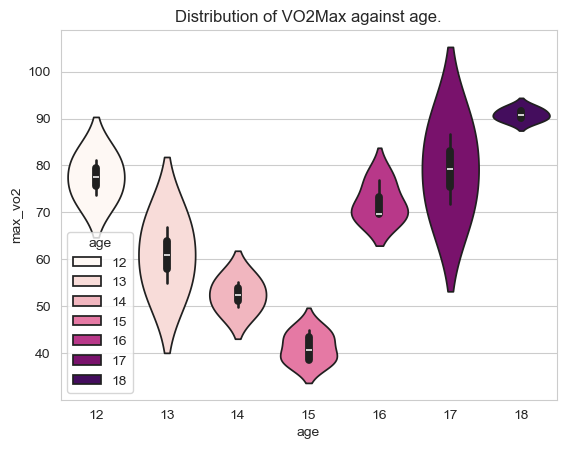

In [1090]:
sum_vo2=merged_sports.groupby(['ID'])['VO2'].sum()
df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','age','VO2','Weight']]
for index,row in df1.iterrows():
     df1.at[index,'max_vo2']=round(df1.at[index,'VO2']/df1.at[index,'Weight'],2)
plt.title("Distribution of VO2Max against age.")
sns.violinplot(x='age',y='max_vo2',hue='age',palette="RdPu",data=df1) 

### QS.78 Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.

<Axes: title={'center': 'Heart rate zones by minutes and the number of athletes in each HR and each minute'}, xlabel='time_min', ylabel='HR_Zone'>

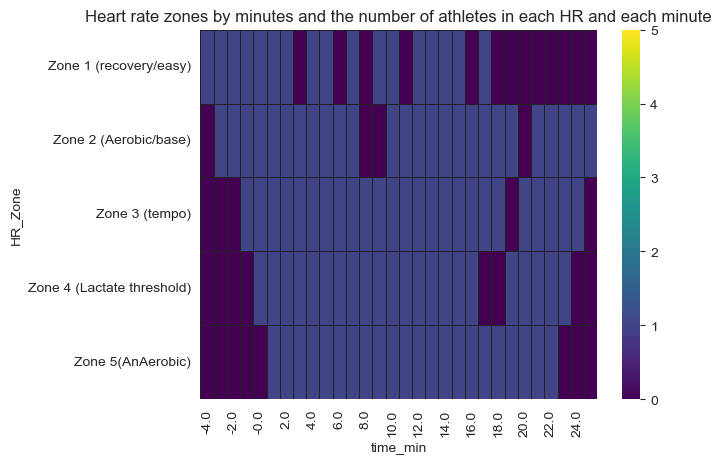

In [1092]:
merged_sports['time_min']=(merged_sports['time']/60).round(0)


g = merged_sports.groupby(['time_min','HR_Zone','ID'])
cnt = g.ID.nunique()
df=cnt.to_frame(name="No_of_Athletes")
df1=df.groupby(['HR_Zone','time_min'])['No_of_Athletes'].sum().reset_index()
result = pd.crosstab(df1['HR_Zone'], df1['time_min'])
plt.title("Heart rate zones by minutes and the number of athletes in each HR and each minute")
sns.heatmap(result,cmap='viridis',vmax=5,vmin=0,linewidth=0.5,linecolor="#222")

### Qs.79  Plot the Donut chart athlete distrubution by Gender

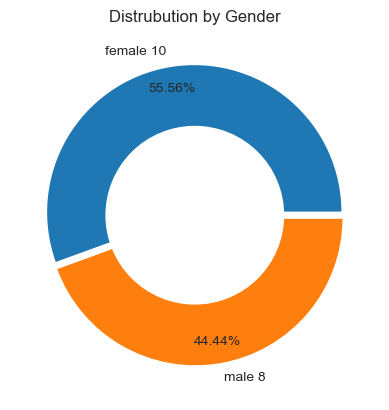

In [1094]:
gender=(Athletes['Gender']).value_counts()
x=('female 10','male 8')
plt.title("Distrubution by Gender")
plt.pie(gender,autopct = '%0.2f%%',labels=x,pctdistance=0.85,explode=(0.02, 0.02))
my_circle=plt.Circle((0,0),0.6,color='white')
plt.gca().add_artist(my_circle) and plt.show()

### Qs. 80 find the size of a Tuple for any given input

In [1096]:
a=(1,2,3,4)
print("tuple length is ",len(a))


tuple length is  4


In [1097]:
#for integer input
'''
result_tuple = tuple(int(item) for item in (input('Enter integers: ')).split())
print(result_tuple)
print(len(result_tuple),"is the tuple length of given input" )
'''

'\nresult_tuple = tuple(int(item) for item in (input(\'Enter integers: \')).split())\nprint(result_tuple)\nprint(len(result_tuple),"is the tuple length of given input" )\n'

In [1098]:
# for any input(80 Q)
'''
result_tuple = tuple((input('Enter integers: ')).split())
print(result_tuple)
print(len(result_tuple),"is the tuple length of given input" )
'''

'\nresult_tuple = tuple((input(\'Enter integers: \')).split())\nprint(result_tuple)\nprint(len(result_tuple),"is the tuple length of given input" )\n'